In [1]:
import numpy as np
import mne
from mne_connectivity import spectral_connectivity_epochs
from spectral_connectivity import Multitaper, Connectivity
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import seaborn as sns
import random
from matplotlib.patches import FancyArrowPatch
from scipy.stats import f_oneway
#from my_networkx import my_draw_networkx_edge_labels
from statsmodels.stats.multicomp import pairwise_tukeyhsd

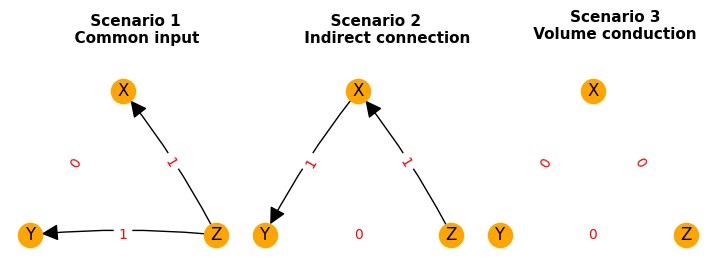

In [31]:
fig, axes = plt.subplots(1,3,figsize=(12,3))

for ax in axes:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

G = nx.DiGraph()
edge_list_1 = [('X','Y',{'w':'A1'}),('Y','Z',{'w':'B1'}),('X','Z',{'w':'C1'})]

edge_list_2 = [('Y','X',{'w':'A2'}),('Z','Y',{'w':'B2'}),('Z','X',{'w':'C2'})]

#SCENARIO 1A
G.add_edges_from(edge_list_1)
G.add_edges_from(edge_list_2)
pos=nx.spring_layout(G,seed=5)
pos = nx.shell_layout(G,rotate=np.pi/2)
arc_rad = 0.05
nx.draw_networkx_edges(G, pos, ax=axes[0], edgelist=edge_list_1, connectionstyle=f'arc3, rad = {arc_rad}',alpha=[0,0,0],arrowsize=25)
nx.draw_networkx_edges(G, pos, ax=axes[0], edgelist=edge_list_2, connectionstyle=f'arc3, rad = {arc_rad}',alpha=[0,1,1],arrowsize=25)
nx.draw_networkx_edge_labels(G, pos, ax=axes[0], edge_labels={('Y','X'):0,('Z','Y'):1,('Z','X'):1},font_color='red')
nx.draw_networkx_nodes(G, pos, ax=axes[0],node_color='orange',alpha=1.0)
nx.draw_networkx_labels(G, pos, ax=axes[0])
axes[0].text(-0.55,1.5,'     Scenario 1 \n  Common input',fontsize=11,fontweight='bold')

"""#SCENARIO 1B
G.add_edges_from(edge_list_1)
G.add_edges_from(edge_list_2)
pos=nx.spring_layout(G,seed=5)
pos = nx.shell_layout(G,rotate=np.pi/2)
arc_rad = 0.05
nx.draw_networkx_edges(G, pos, ax=axes[1], edgelist=edge_list_1, connectionstyle=f'arc3, rad = {arc_rad}',alpha=[1,0,0],arrowsize=25)
nx.draw_networkx_edges(G, pos, ax=axes[1], edgelist=edge_list_2, connectionstyle=f'arc3, rad = {arc_rad}',alpha=[0,1,1],arrowsize=25)
nx.draw_networkx_edge_labels(G, pos, ax=axes[1], edge_labels={('Y','X'):1,('Z','Y'):1,('Z','X'):1},font_color='red')
nx.draw_networkx_nodes(G, pos, ax=axes[1],node_color='orange',alpha=1.0)
nx.draw_networkx_labels(G, pos, ax=axes[1])
axes[1].set_title('1B',fontsize=11)"""

#SCENARIO 2A
G.add_edges_from(edge_list_1)
G.add_edges_from(edge_list_2)
pos=nx.spring_layout(G,seed=5)
pos = nx.shell_layout(G,rotate=np.pi/2)
arc_rad = 0.05
nx.draw_networkx_edges(G, pos, ax=axes[1], edgelist=edge_list_1, connectionstyle=f'arc3, rad = {arc_rad}',alpha=[1,0,0],arrowsize=25)
nx.draw_networkx_edges(G, pos, ax=axes[1], edgelist=edge_list_2, connectionstyle=f'arc3, rad = {arc_rad}',alpha=[0,0,1],arrowsize=25)
nx.draw_networkx_edge_labels(G, pos, ax=axes[1], edge_labels={('Y','X'):1,('Z','Y'):0,('Z','X'):1},font_color='red')
nx.draw_networkx_nodes(G, pos, ax=axes[1],node_color='orange',alpha=1.0)
nx.draw_networkx_labels(G, pos, ax=axes[1])
axes[1].text(-0.55,1.5,'      Scenario 2 \n Indirect connection',fontsize=11,fontweight='bold')

"""#SCENARIO 2B
G.add_edges_from(edge_list_1)
G.add_edges_from(edge_list_2)
pos=nx.spring_layout(G,seed=5)
pos = nx.shell_layout(G,rotate=np.pi/2)
arc_rad = 0.05
nx.draw_networkx_edges(G, pos, ax=axes[3], edgelist=edge_list_1, connectionstyle=f'arc3, rad = {arc_rad}',alpha=[1,0,0],arrowsize=25)
nx.draw_networkx_edges(G, pos, ax=axes[3], edgelist=edge_list_2, connectionstyle=f'arc3, rad = {arc_rad}',alpha=[0,1,1],arrowsize=25)
nx.draw_networkx_edge_labels(G, pos, ax=axes[3], edge_labels={('Y','X'):1,('Z','Y'):1,('Z','X'):1},font_color='red')
nx.draw_networkx_nodes(G, pos, ax=axes[3],node_color='orange',alpha=1.0)
nx.draw_networkx_labels(G, pos, ax=axes[3])
axes[3].set_title('2B',fontsize=11)"""

#SCENARIO 3
G = nx.Graph()
edge_list = [('X','Y',{'w':'A1'}),
             ('Y','Z',{'w':'B1'}),
             ('X','Z',{'w':'C1'})]
G.add_edges_from(edge_list)
pos = nx.spring_layout(G,seed=5)
pos = nx.shell_layout(G, rotate=np.pi/2, scale=0.1)
nx.draw_networkx_edges(G, pos, ax=axes[2], edgelist=edge_list, alpha=[0,0,0])
arc_rad = 0.05
nx.draw_networkx_edge_labels(G, pos, ax=axes[2], edge_labels={('Y','X'):0,('Z','Y'):0,('Z','X'):0},font_color='red')
nx.draw_networkx_nodes(G, pos, ax=axes[2], node_color='orange',alpha=1.0)
axes[2].text(-0.06,0.154,'        Scenario 3 \n Volume conduction',fontsize=11,fontweight='bold')
nx.draw_networkx_labels(G, pos, ax=axes[2])

fig.tight_layout()
plt.subplots_adjust(bottom=0.02, left=0.02, right=0.6, top=0.6)
plt.savefig('figs/scenarios_figs.png',dpi=300)